In [1]:
# Importing the toolbox (takes several seconds)
import pandas as pd
from pathlib import Path
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("discrimination_data.csv",delimiter=';',header=None, index_col=None)
df

,0,1,2,3,4,5,6,7,8,9,...,63,64,65,66,67,68,69,70,71,72
0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,...,Column64,Column65,Column66,Column67,Column68,Column69,Column70,Column71,Column72,Column73
1,individuals,individual1,individual1,individual1,individual1,individual1,individual1,individual1,individual1,individual1,...,individual2,individual2,individual2,individual2,individual2,individual2,individual2,individual2,individual2,individual2
2,bodyparts,nose,nose,nose,rightear,rightear,rightear,leftear,leftear,leftear,...,tailbase,tail1,tail1,tail1,tail2,tail2,tail2,tailend,tailend,tailend
3,coords,x,y,likelihood,x,y,likelihood,x,y,likelihood,...,likelihood,x,y,likelihood,x,y,likelihood,x,y,likelihood
4,0,408.285,831.538,1.0,413.874,857.914,1.0,396.68,853.354,1.0,...,1.0,407.081,226.773,1.0,406.37,202.12,1.0,410.763,175.743,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4581,4577,758.655,312.516,1.0,747.942,329.695,1.0,738.043,316.328,1.0,...,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0
4582,4578,758.722,313.137,1.0,751.125,330.742,1.0,743.423,316.804,1.0,...,0.9990000128746033,202.526,746.134,0.8299999833106995,NaN,NaN,0.0,NaN,NaN,0.0
4583,4579,761.5,313.493,1.0,755.464,330.627,1.0,748.148,317.507,1.0,...,1.0,200.239,727.738,1.0,196.484,744.479,1.0,NaN,NaN,0.0
4584,4580,762.791,311.719,1.0,759.351,330.591,1.0,749.139,318.803,1.0,...,1.0,193.362,722.142,1.0,186.266,743.563,1.0,173.96,755.783,0.5189999938011169


In [18]:
df=df.tail(-1)
df

,0,1,2,3,4,5,6,7,8,9,...,63,64,65,66,67,68,69,70,71,72
1,individuals,individual1,individual1,individual1,individual1,individual1,individual1,individual1,individual1,individual1,...,individual2,individual2,individual2,individual2,individual2,individual2,individual2,individual2,individual2,individual2
2,bodyparts,nose,nose,nose,rightear,rightear,rightear,leftear,leftear,leftear,...,tailbase,tail1,tail1,tail1,tail2,tail2,tail2,tailend,tailend,tailend
3,coords,x,y,likelihood,x,y,likelihood,x,y,likelihood,...,likelihood,x,y,likelihood,x,y,likelihood,x,y,likelihood
4,0,408.285,831.538,1.0,413.874,857.914,1.0,396.68,853.354,1.0,...,1.0,407.081,226.773,1.0,406.37,202.12,1.0,410.763,175.743,1.0
5,1,409.485,836.515,1.0,415.346,857.323,1.0,397.082,856.131,1.0,...,1.0,411.316,232.584,1.0,410.386,205.796,1.0,414.274,179.297,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4581,4577,758.655,312.516,1.0,747.942,329.695,1.0,738.043,316.328,1.0,...,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0
4582,4578,758.722,313.137,1.0,751.125,330.742,1.0,743.423,316.804,1.0,...,0.9990000128746033,202.526,746.134,0.8299999833106995,NaN,NaN,0.0,NaN,NaN,0.0
4583,4579,761.5,313.493,1.0,755.464,330.627,1.0,748.148,317.507,1.0,...,1.0,200.239,727.738,1.0,196.484,744.479,1.0,NaN,NaN,0.0
4584,4580,762.791,311.719,1.0,759.351,330.591,1.0,749.139,318.803,1.0,...,1.0,193.362,722.142,1.0,186.266,743.563,1.0,173.96,755.783,0.5189999938011169


In [19]:
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header

In [20]:
df

1,individuals,individual1,individual1,individual1,individual1,individual1,individual1,individual1,individual1,individual1,...,individual2,individual2,individual2,individual2,individual2,individual2,individual2,individual2,individual2,individual2
2,bodyparts,nose,nose,nose,rightear,rightear,rightear,leftear,leftear,leftear,...,tailbase,tail1,tail1,tail1,tail2,tail2,tail2,tailend,tailend,tailend
3,coords,x,y,likelihood,x,y,likelihood,x,y,likelihood,...,likelihood,x,y,likelihood,x,y,likelihood,x,y,likelihood
4,0,408.285,831.538,1.0,413.874,857.914,1.0,396.68,853.354,1.0,...,1.0,407.081,226.773,1.0,406.37,202.12,1.0,410.763,175.743,1.0
5,1,409.485,836.515,1.0,415.346,857.323,1.0,397.082,856.131,1.0,...,1.0,411.316,232.584,1.0,410.386,205.796,1.0,414.274,179.297,1.0
6,2,413.254,837.581,1.0,416.82,858.257,1.0,397.696,854.879,1.0,...,1.0,415.114,235.65,1.0,412.05,213.501,1.0,425.864,186.13,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4581,4577,758.655,312.516,1.0,747.942,329.695,1.0,738.043,316.328,1.0,...,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0
4582,4578,758.722,313.137,1.0,751.125,330.742,1.0,743.423,316.804,1.0,...,0.9990000128746033,202.526,746.134,0.8299999833106995,NaN,NaN,0.0,NaN,NaN,0.0
4583,4579,761.5,313.493,1.0,755.464,330.627,1.0,748.148,317.507,1.0,...,1.0,200.239,727.738,1.0,196.484,744.479,1.0,NaN,NaN,0.0
4584,4580,762.791,311.719,1.0,759.351,330.591,1.0,749.139,318.803,1.0,...,1.0,193.362,722.142,1.0,186.266,743.563,1.0,173.96,755.783,0.5189999938011169


In [21]:
ind1=df.filter(regex='individual1')
ind2=df.filter(regex='individual2')

In [22]:
ind1.columns = [ind1.iloc[0].values, ind1.iloc[1].values]
ind1= ind1.iloc[2:].reset_index(drop=True)
ind1

nose                     rightear                      leftear  \
            x        y likelihood        x        y likelihood        x   
0     408.285  831.538        1.0  413.874  857.914        1.0   396.68   
1     409.485  836.515        1.0  415.346  857.323        1.0  397.082   
2     413.254  837.581        1.0   416.82  858.257        1.0  397.696   
3     418.651  833.266        1.0    420.4  857.344        1.0  399.043   
4     414.294  833.914        1.0  418.907  857.925        1.0  399.302   
...       ...      ...        ...      ...      ...        ...      ...   
4577  758.655  312.516        1.0  747.942  329.695        1.0  738.043   
4578  758.722  313.137        1.0  751.125  330.742        1.0  743.423   
4579    761.5  313.493        1.0  755.464  330.627        1.0  748.148   
4580  762.791  311.719        1.0  759.351  330.591        1.0  749.139   
4581  761.459  304.178        1.0   760.06  330.616        1.0  748.068   

                         shoulder  ...   tailbase    tail1           \
            y likelihood        x  ... likelihood        x        y   
0     853.354        1.0  404.289  ...        1.0  425.171  922.994   
1     856.131        1.0  403.348  ...        1.0  425.171   921.52   
2     854.879        1.0  403.741  ...        1.0  415.736  925.229   
3     846.708        1.0  406.615  ...        1.0  413.921  927.919   
4     850.082        1.0  409.012  ...        1.0  408.684   924.93   
...       ...        ...      ...  ...        ...      ...      ...   
4577  316.328        1.0  744.183  ...        1.0  683.254  369.531   
4578  316.804        1.0   746.95  ...        1.0  685.513  372.198   
4579  317.507        1.0   740.32  ...        1.0   686.95  369.871   
4580  318.803        1.0  742.242  ...        1.0  685.236   368.74   
4581  315.304        1.0  746.298  ...        1.0  689.473  366.388   

                   tail2                      tailend                      
     likelihood        x        y likelihood        x        y likelihood  
0           1.0  448.502    921.1        1.0   465.38  905.573        1.0  
1           1.0   447.28   916.02        1.0  466.666  891.688        1.0  
2           1.0   438.86  921.027        1.0  460.879  894.402        1.0  
3           1.0  435.946  923.476        1.0  457.768  892.508        1.0  
4           1.0  428.312  924.195        1.0  452.552  895.731        1.0  
...         ...      ...      ...        ...      ...      ...        ...  
4577        1.0  664.485  379.668        1.0  643.069  409.316        1.0  
4578        1.0  665.352  386.363        1.0  649.305  406.789        1.0  
4579        1.0    666.4  385.105        1.0  646.359  411.875        1.0  
4580        1.0  668.032  383.991        1.0  648.922  405.624        1.0  
4581        1.0  668.323  384.719        1.0  651.481  401.562        1.0  

[4582 rows x 36 columns]

In [23]:
ind2.columns = [ind2.iloc[0].values, ind2.iloc[1].values]
ind2= ind2.iloc[2:].reset_index(drop=True)
ind2

nose                     rightear                      leftear  \
            x        y likelihood        x        y likelihood        x   
0     402.065  330.928        1.0  396.832  313.275        1.0  416.393   
1     398.109  334.227        1.0  392.239  312.263        1.0  411.925   
2     393.051  331.108        1.0  392.293  317.622        1.0  409.434   
3      386.99   319.37        1.0  391.777  305.462        1.0  406.274   
4     385.086   314.19        1.0  386.235  294.083        1.0  395.834   
...       ...      ...        ...      ...      ...        ...      ...   
4577  193.386  647.602        1.0  203.318  667.637        1.0  183.227   
4578  191.166   632.19        1.0  208.306  646.721        1.0  186.718   
4579   184.68  622.009        1.0  202.951  635.308        1.0  185.749   
4580  189.161  618.496        1.0  207.148  628.948        1.0  186.661   
4581  187.636  607.117        1.0  204.901  625.496        1.0  186.522   

                         shoulder  ...            tailbase    tail1           \
            y likelihood        x  ...          likelihood        x        y   
0     319.804        1.0  404.662  ...                 1.0  407.081  226.773   
1     323.234        1.0  400.436  ...                 1.0  411.316  232.584   
2     323.203        1.0  398.939  ...                 1.0  415.114   235.65   
3      318.98        1.0   396.48  ...                 1.0  423.025  234.914   
4     310.024        1.0  393.787  ...                 1.0  427.253   232.34   
...       ...        ...      ...  ...                 ...      ...      ...   
4577  664.477        1.0  194.573  ...                 0.0      NaN      NaN   
4578  653.303        1.0  201.248  ...  0.9990000128746033  202.526  746.134   
4579  642.216        1.0  201.685  ...                 1.0  200.239  727.738   
4580  636.331        1.0  200.659  ...                 1.0  193.362  722.142   
4581  629.294        1.0  200.715  ...                 1.0  194.087  712.829   

                            tail2                      tailend           \
              likelihood        x        y likelihood        x        y   
0                    1.0   406.37   202.12        1.0  410.763  175.743   
1                    1.0  410.386  205.796        1.0  414.274  179.297   
2                    1.0   412.05  213.501        1.0  425.864   186.13   
3                    1.0  426.211  206.269        1.0  431.675   183.74   
4                    1.0  428.457  203.725        1.0  433.625   177.33   
...                  ...      ...      ...        ...      ...      ...   
4577                 0.0      NaN      NaN        0.0      NaN      NaN   
4578  0.8299999833106995      NaN      NaN        0.0      NaN      NaN   
4579                 1.0  196.484  744.479        1.0      NaN      NaN   
4580                 1.0  186.266  743.563        1.0   173.96  755.783   
4581                 1.0  188.379  735.324        1.0   179.55  745.664   

                          
              likelihood  
0                    1.0  
1                    1.0  
2                    1.0  
3                    1.0  
4                    1.0  
...                  ...  
4577                 0.0  
4578                 0.0  
4579                 0.0  
4580  0.5189999938011169  
4581  0.9819999933242798  

[4582 rows x 36 columns]

In [24]:
ind1.astype(float)

nose                     rightear                      leftear  \
            x        y likelihood        x        y likelihood        x   
0     408.285  831.538        1.0  413.874  857.914        1.0  396.680   
1     409.485  836.515        1.0  415.346  857.323        1.0  397.082   
2     413.254  837.581        1.0  416.820  858.257        1.0  397.696   
3     418.651  833.266        1.0  420.400  857.344        1.0  399.043   
4     414.294  833.914        1.0  418.907  857.925        1.0  399.302   
...       ...      ...        ...      ...      ...        ...      ...   
4577  758.655  312.516        1.0  747.942  329.695        1.0  738.043   
4578  758.722  313.137        1.0  751.125  330.742        1.0  743.423   
4579  761.500  313.493        1.0  755.464  330.627        1.0  748.148   
4580  762.791  311.719        1.0  759.351  330.591        1.0  749.139   
4581  761.459  304.178        1.0  760.060  330.616        1.0  748.068   

                         shoulder  ...   tailbase    tail1           \
            y likelihood        x  ... likelihood        x        y   
0     853.354        1.0  404.289  ...        1.0  425.171  922.994   
1     856.131        1.0  403.348  ...        1.0  425.171  921.520   
2     854.879        1.0  403.741  ...        1.0  415.736  925.229   
3     846.708        1.0  406.615  ...        1.0  413.921  927.919   
4     850.082        1.0  409.012  ...        1.0  408.684  924.930   
...       ...        ...      ...  ...        ...      ...      ...   
4577  316.328        1.0  744.183  ...        1.0  683.254  369.531   
4578  316.804        1.0  746.950  ...        1.0  685.513  372.198   
4579  317.507        1.0  740.320  ...        1.0  686.950  369.871   
4580  318.803        1.0  742.242  ...        1.0  685.236  368.740   
4581  315.304        1.0  746.298  ...        1.0  689.473  366.388   

                   tail2                      tailend                      
     likelihood        x        y likelihood        x        y likelihood  
0           1.0  448.502  921.100        1.0  465.380  905.573        1.0  
1           1.0  447.280  916.020        1.0  466.666  891.688        1.0  
2           1.0  438.860  921.027        1.0  460.879  894.402        1.0  
3           1.0  435.946  923.476        1.0  457.768  892.508        1.0  
4           1.0  428.312  924.195        1.0  452.552  895.731        1.0  
...         ...      ...      ...        ...      ...      ...        ...  
4577        1.0  664.485  379.668        1.0  643.069  409.316        1.0  
4578        1.0  665.352  386.363        1.0  649.305  406.789        1.0  
4579        1.0  666.400  385.105        1.0  646.359  411.875        1.0  
4580        1.0  668.032  383.991        1.0  648.922  405.624        1.0  
4581        1.0  668.323  384.719        1.0  651.481  401.562        1.0  

[4582 rows x 36 columns]

In [25]:
def get_cmap(n, name='hsv'):
    return plt.cm.get_cmap(name, n)

def Histogram(vector,color,bins):
    dvector=np.diff(vector)
    dvector=dvector[np.isfinite(dvector)]
    plt.hist(dvector,color=color,histtype='step',bins=bins)

def PlottingResults(Dataframe,bodyparts2plot,alphavalue=.2,pcutoff=.5,colormap='jet',fs=(4,3)):
    ''' Plots poses vs time; pose x vs pose y; histogram of differences and likelihoods.'''
    plt.figure(figsize=fs)
    colors = get_cmap(len(bodyparts2plot),name = colormap)
    scorer=Dataframe.columns.get_level_values(0)[0] #you can read out the header to get the scorer name!

    for bpindex, bp in enumerate(bodyparts2plot):
        Index=Dataframe[scorer][bp]['likelihood'].values > pcutoff
        plt.plot(Dataframe[scorer][bp]['x'].values[Index],Dataframe[scorer][bp]['y'].values[Index],'.',color=colors(bpindex),alpha=alphavalue)

    plt.gca().invert_yaxis()

    sm = plt.cm.ScalarMappable(cmap=plt.get_cmap(colormap), norm=plt.Normalize(vmin=0, vmax=len(bodyparts2plot)-1))
    sm._A = []
    cbar = plt.colorbar(sm,ticks=range(len(bodyparts2plot)))
    cbar.set_ticklabels(bodyparts2plot)
    #plt.savefig(os.path.join(tmpfolder,"trajectory"+suffix))
    plt.figure(figsize=fs)
    Time=np.arange(np.size(Dataframe[scorer][bodyparts2plot[0]]['x'].values))

    for bpindex, bp in enumerate(bodyparts2plot):
        Index=Dataframe[scorer][bp]['likelihood'].values > pcutoff
        plt.plot(Time[Index],Dataframe[scorer][bp]['x'].values[Index],'--',color=colors(bpindex),alpha=alphavalue)
        plt.plot(Time[Index],Dataframe[scorer][bp]['y'].values[Index],'-',color=colors(bpindex),alpha=alphavalue)

    sm = plt.cm.ScalarMappable(cmap=plt.get_cmap(colormap), norm=plt.Normalize(vmin=0, vmax=len(bodyparts2plot)-1))
    sm._A = []
    cbar = plt.colorbar(sm,ticks=range(len(bodyparts2plot)))
    cbar.set_ticklabels(bodyparts2plot)
    plt.xlabel('Frame index')
    plt.ylabel('X and y-position in pixels')
    #plt.savefig(os.path.join(tmpfolder,"plot"+suffix))

    plt.figure(figsize=fs)
    for bpindex, bp in enumerate(bodyparts2plot):
        Index=Dataframe[scorer][bp]['likelihood'].values > pcutoff
        plt.plot(Time,Dataframe[scorer][bp]['likelihood'].values,'-',color=colors(bpindex),alpha=alphavalue)

    sm = plt.cm.ScalarMappable(cmap=plt.get_cmap(colormap), norm=plt.Normalize(vmin=0, vmax=len(bodyparts2plot)-1))
    sm._A = []
    cbar = plt.colorbar(sm,ticks=range(len(bodyparts2plot)))
    cbar.set_ticklabels(bodyparts2plot)
    plt.xlabel('Frame index')
    plt.ylabel('likelihood')

    #plt.savefig(os.path.join(tmpfolder,"plot-likelihood"+suffix))

    plt.figure(figsize=fs)
    bins=np.linspace(0,np.amax(Dataframe.max()),100)

    for bpindex, bp in enumerate(bodyparts2plot):
        Index=Dataframe[scorer][bp]['likelihood'].values < pcutoff
        X=Dataframe[scorer][bp]['x'].values
        X[Index]=np.nan
        Histogram(X,colors(bpindex),bins)
        Y=Dataframe[scorer][bp]['x'].values
        Y[Index]=np.nan
        Histogram(Y,colors(bpindex),bins)

    sm = plt.cm.ScalarMappable(cmap=plt.get_cmap(colormap), norm=plt.Normalize(vmin=0, vmax=len(bodyparts2plot)-1))
    sm._A = []
    cbar = plt.colorbar(sm,ticks=range(len(bodyparts2plot)))
    cbar.set_ticklabels(bodyparts2plot)
    plt.ylabel('Count')
    plt.xlabel('DeltaX and DeltaY')
    
    #plt.savefig(os.path.join(tmpfolder,"hist"+suffix))

In [26]:
DataFrame=ind1

In [27]:
bodyparts=DataFrame.columns.get_level_values(0)
bodyparts=bodyparts.unique()
bodyparts.astype(str)

Index(['nose', 'rightear', 'leftear', 'shoulder', 'spine1', 'spine2', 'spine3',
       'spine4', 'tailbase', 'tail1', 'tail2', 'tailend'],
      dtype='object')

In [28]:
bodyparts2plot=bodyparts #you could also take a subset, i.e. =['snout']

%matplotlib inline
PlottingResults(DataFrame,bodyparts2plot)#,alphavalue=.2)#,pcutoff=.5,fs=(8,4))

KeyError: 'nose'

<Figure size 288x216 with 0 Axes>

In [29]:
#ind1['nose']['x']
ind1

nose                     rightear                      leftear  \
            x        y likelihood        x        y likelihood        x   
0     408.285  831.538        1.0  413.874  857.914        1.0   396.68   
1     409.485  836.515        1.0  415.346  857.323        1.0  397.082   
2     413.254  837.581        1.0   416.82  858.257        1.0  397.696   
3     418.651  833.266        1.0    420.4  857.344        1.0  399.043   
4     414.294  833.914        1.0  418.907  857.925        1.0  399.302   
...       ...      ...        ...      ...      ...        ...      ...   
4577  758.655  312.516        1.0  747.942  329.695        1.0  738.043   
4578  758.722  313.137        1.0  751.125  330.742        1.0  743.423   
4579    761.5  313.493        1.0  755.464  330.627        1.0  748.148   
4580  762.791  311.719        1.0  759.351  330.591        1.0  749.139   
4581  761.459  304.178        1.0   760.06  330.616        1.0  748.068   

                         shoulder  ...   tailbase    tail1           \
            y likelihood        x  ... likelihood        x        y   
0     853.354        1.0  404.289  ...        1.0  425.171  922.994   
1     856.131        1.0  403.348  ...        1.0  425.171   921.52   
2     854.879        1.0  403.741  ...        1.0  415.736  925.229   
3     846.708        1.0  406.615  ...        1.0  413.921  927.919   
4     850.082        1.0  409.012  ...        1.0  408.684   924.93   
...       ...        ...      ...  ...        ...      ...      ...   
4577  316.328        1.0  744.183  ...        1.0  683.254  369.531   
4578  316.804        1.0   746.95  ...        1.0  685.513  372.198   
4579  317.507        1.0   740.32  ...        1.0   686.95  369.871   
4580  318.803        1.0  742.242  ...        1.0  685.236   368.74   
4581  315.304        1.0  746.298  ...        1.0  689.473  366.388   

                   tail2                      tailend                      
     likelihood        x        y likelihood        x        y likelihood  
0           1.0  448.502    921.1        1.0   465.38  905.573        1.0  
1           1.0   447.28   916.02        1.0  466.666  891.688        1.0  
2           1.0   438.86  921.027        1.0  460.879  894.402        1.0  
3           1.0  435.946  923.476        1.0  457.768  892.508        1.0  
4           1.0  428.312  924.195        1.0  452.552  895.731        1.0  
...         ...      ...      ...        ...      ...      ...        ...  
4577        1.0  664.485  379.668        1.0  643.069  409.316        1.0  
4578        1.0  665.352  386.363        1.0  649.305  406.789        1.0  
4579        1.0    666.4  385.105        1.0  646.359  411.875        1.0  
4580        1.0  668.032  383.991        1.0  648.922  405.624        1.0  
4581        1.0  668.323  384.719        1.0  651.481  401.562        1.0  

[4582 rows x 36 columns]

In [30]:
ind1=ind1.fillna(0)

In [31]:
ind2=ind2.fillna(0)

In [32]:
ind1=ind1.astype(float)

In [33]:
ind2=ind2.astype(float)

In [34]:
type(ind1['nose']['x'][2])

numpy.float64

## Individual 1 (top arena)


In [35]:
import time_in_each_roi #the function needs to be in the same folder as the notebook

#let's calculate velocity of the snout
bpt='nose'
vel = time_in_each_roi.calc_distance_between_points_in_a_vector_2d(np.vstack([ind1[bpt]['x'].values.flatten(), ind1[bpt]['y'].values.flatten()]).T)

fps=13.88 # frame rate of camera in those experiments
time=np.arange(len(vel))*1./fps
vel=vel #notice the units of vel are relative pixel distance [per time step]

# store in other variables:
xsnout=ind1[bpt]['x'].values
ysnout=ind1[bpt]['y'].values
vsnout=vel

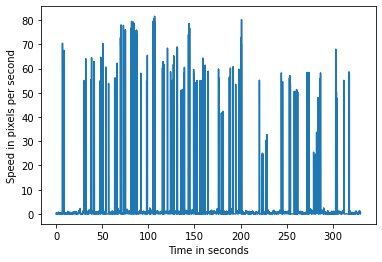

In [36]:
%matplotlib inline

plt.plot(time,vel*1./fps)
plt.xlabel('Time in seconds')
plt.ylabel('Speed in pixels per second')
plt.show()

In [37]:
#define bounding boxes (here for left and right side of treadmill, displayed below)
from collections import namedtuple
position = namedtuple('position', ['topleft', 'bottomright'])
bp_tracking = np.array((xsnout, ysnout, vsnout))

#two points defining each roi: topleft(X,Y) and bottomright(X,Y).
rois = {'leftside': position((150, 0), (366,500)),'center': position((366, 0), (582, 500)),'rightside': position((582, 0), (810, 500))} 
print(rois)

{'leftside': position(topleft=(150, 0), bottomright=(366, 500)), 'center': position(topleft=(366, 0), bottomright=(582, 500)), 'rightside': position(topleft=(582, 0), bottomright=(810, 500))}


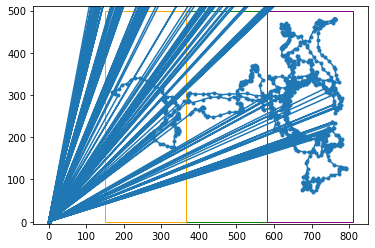

In [38]:
import matplotlib.patches as patches
fig,ax = plt.subplots(1)

plt.plot(xsnout,ysnout,'.-')

rect = patches.Rectangle(rois['rightside'].topleft,rois['rightside'].bottomright[0]-rois['rightside'].topleft[0],rois['rightside'].bottomright[1]-rois['rightside'].topleft[1],linewidth=1,edgecolor='purple',facecolor='none')
ax.add_patch(rect)
rect = patches.Rectangle(rois['center'].topleft,rois['center'].bottomright[0]-rois['center'].topleft[0],rois['center'].bottomright[1]-rois['center'].topleft[1],linewidth=1,edgecolor='green',facecolor='none')
ax.add_patch(rect)
rect = patches.Rectangle(rois['leftside'].topleft,rois['leftside'].bottomright[0]-rois['leftside'].topleft[0],rois['leftside'].bottomright[1]-rois['leftside'].topleft[1],linewidth=1,edgecolor='orange',facecolor='none')
ax.add_patch(rect)
plt.ylim(-5,510)
plt.show()

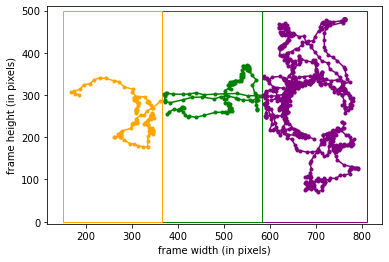

In [39]:
import numpy as np
import matplotlib.patches as patches

fig, ax = plt.subplots(1)

# Create a mask to identify the data points that are inside the rightside ROI
mask = (xsnout >= rois['rightside'].topleft[0]) & (xsnout <= rois['rightside'].bottomright[0]) & \
       (ysnout >= rois['rightside'].topleft[1]) & (ysnout <= rois['rightside'].bottomright[1])

# Plot the data points inside the rightside ROI with gaps
plt.plot(np.where(mask, xsnout, np.nan), np.where(mask, ysnout, np.nan), '.-', color='purple')

# Create a mask to identify the data points that are inside the center ROI
mask = (xsnout >= rois['center'].topleft[0]) & (xsnout <= rois['center'].bottomright[0]) & \
       (ysnout >= rois['center'].topleft[1]) & (ysnout <= rois['center'].bottomright[1])

# Plot the data points inside the center ROI with gaps
plt.plot(np.where(mask, xsnout, np.nan), np.where(mask, ysnout, np.nan), '.-', color='green')

# Create a mask to identify the data points that are inside the leftside ROI
mask = (xsnout >= rois['leftside'].topleft[0]) & (xsnout <= rois['leftside'].bottomright[0]) & \
       (ysnout >= rois['leftside'].topleft[1]) & (ysnout <= rois['leftside'].bottomright[1])

# Plot the data points inside the leftside ROI with gaps
plt.plot(np.where(mask, xsnout, np.nan), np.where(mask, ysnout, np.nan), '.-', color='orange')

# Add the ROI rectangles to the plot
rect = patches.Rectangle(rois['rightside'].topleft, rois['rightside'].bottomright[0] - rois['rightside'].topleft[0], 
                         rois['rightside'].bottomright[1] - rois['rightside'].topleft[1], linewidth=1, edgecolor='purple', facecolor='none')
ax.add_patch(rect)


rect = patches.Rectangle(rois['center'].topleft, rois['center'].bottomright[0] - rois['center'].topleft[0], 
                         rois['center'].bottomright[1] - rois['center'].topleft[1], linewidth=1, edgecolor='green', facecolor='none')

ax.add_patch(rect)

 
rect = patches.Rectangle(rois['leftside'].topleft, rois['leftside'].bottomright[0] - rois['leftside'].topleft[0], 
                         rois['leftside'].bottomright[1] - rois['leftside'].topleft[1], linewidth=1, edgecolor='orange', facecolor='none')
ax.add_patch(rect)

plt.ylim(-5, 510)
plt.xlabel('frame width (in pixels)')
plt.ylabel('frame height (in pixels)')
plt.show()

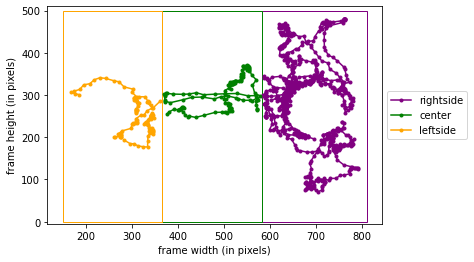

In [40]:
import numpy as np
import matplotlib.patches as patches

fig, ax = plt.subplots(1)

# Create a mask to identify the data points that are inside the rightside ROI
mask = (xsnout >= rois['rightside'].topleft[0]) & (xsnout <= rois['rightside'].bottomright[0]) & \
       (ysnout >= rois['rightside'].topleft[1]) & (ysnout <= rois['rightside'].bottomright[1])

# Plot the data points inside the rightside ROI with gaps
plt.plot(np.where(mask, xsnout, np.nan), np.where(mask, ysnout, np.nan), '.-', color='purple', label='rightside')

# Create a mask to identify the data points that are inside the center ROI
mask = (xsnout >= rois['center'].topleft[0]) & (xsnout <= rois['center'].bottomright[0]) & \
       (ysnout >= rois['center'].topleft[1]) & (ysnout <= rois['center'].bottomright[1])

# Plot the data points inside the center ROI with gaps
plt.plot(np.where(mask, xsnout, np.nan), np.where(mask, ysnout, np.nan), '.-', color='green', label='center')

# Create a mask to identify the data points that are inside the leftside ROI
mask = (xsnout >= rois['leftside'].topleft[0]) & (xsnout <= rois['leftside'].bottomright[0]) & \
       (ysnout >= rois['leftside'].topleft[1]) & (ysnout <= rois['leftside'].bottomright[1])

# Plot the data points inside the leftside ROI with gaps
plt.plot(np.where(mask, xsnout, np.nan), np.where(mask, ysnout, np.nan), '.-', color='orange', label='leftside')

# Add the ROI rectangles to the plot
rect = patches.Rectangle(rois['rightside'].topleft, rois['rightside'].bottomright[0] - rois['rightside'].topleft[0], 
                         rois['rightside'].bottomright[1] - rois['rightside'].topleft[1], linewidth=1, edgecolor='purple', facecolor='none')
ax.add_patch(rect)


rect = patches.Rectangle(rois['center'].topleft, rois['center'].bottomright[0] - rois['center'].topleft[0], 
                         rois['center'].bottomright[1] - rois['center'].topleft[1], linewidth=1, edgecolor='green', facecolor='none')

ax.add_patch(rect)

 
rect = patches.Rectangle(rois['leftside'].topleft, rois['leftside'].bottomright[0] - rois['leftside'].topleft[0], 
                         rois['leftside'].bottomright[1] - rois['leftside'].topleft[1], linewidth=1, edgecolor='orange', facecolor='none')
ax.add_patch(rect)

# Add legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.ylim(-5, 510)
plt.xlabel('frame width (in pixels)')
plt.ylabel('frame height (in pixels)')
plt.show()


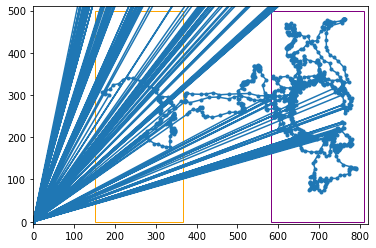

In [41]:
fig, ax = plt.subplots(1)
plt.plot(xsnout, ysnout, '.-')

right_rect = patches.Rectangle(
    rois['rightside'].topleft,
    rois['rightside'].bottomright[0] - rois['rightside'].topleft[0],
    rois['rightside'].bottomright[1] - rois['rightside'].topleft[1],
    linewidth=1,
    edgecolor='purple',
    facecolor='none'
)
ax.add_patch(right_rect)

left_rect = patches.Rectangle(
    rois['leftside'].topleft,
    rois['leftside'].bottomright[0] - rois['leftside'].topleft[0],
    rois['leftside'].bottomright[1] - rois['leftside'].topleft[1],
    linewidth=1,
    edgecolor='orange',
    facecolor='none'
)
ax.add_patch(left_rect)

# Set the x-axis limit to exclude the part of the line drawn from the origin
plt.xlim(rois['leftside'].topleft[0], 1000)

# Add a separate line segment connecting the last point in the right ROI
# to the first point in the left ROI
right_end = (xsnout[rois['rightside'].bottomright[0]], ysnout[rois['rightside'].topleft[1]])
left_start = (xsnout[rois['leftside'].topleft[0]], ysnout[rois['leftside'].topleft[1]])
plt.plot([right_end[0], left_start[0]], [right_end[1], left_start[1]], color='black')

plt.ylim(-5, 510)
plt.xlim(0,820)
plt.show()


In [42]:
import time_in_each_roi #the function needs to be in the same folder as the notebook

res = time_in_each_roi.get_timeinrois_stats(bp_tracking.T, rois, fps=13.88)

#print results:
res

c:\Users\Berni\Desktop\Msc thesis\time_in_each_roi.py:134: UserWarning: Warning: you've set check_inroi=False, so data reflect which ROI is closest even if tracked point is not in any given ROI.
  warnings.warn("Warning: you've set check_inroi=False, so data reflect which ROI is closest even if tracked point is not in any given ROI.")


{'transitions_per_roi': {'center': 23,
  'leftside': 53,
  'rightside': 47,
  'tot': 123},
 'cumulative_time_in_roi': {'rightside': 1630,
  'leftside': 1979,
  'center': 973,
  'tot': 4582},
 'cumulative_time_in_roi_sec': {'rightside': 117.43515850144091,
  'leftside': 142.5792507204611,
  'center': 70.10086455331411,
  'tot': 330.1152737752161},
 'avg_time_in_roi': {'center': 70.8695652173913,
  'leftside': 37.339622641509436,
  'rightside': 20.70212765957447,
  'tot': 128.9113155184752},
 'avg_time_in_roi_sec': {'center': 5.1058764565843875,
  'leftside': 2.6901745418954923,
  'rightside': 1.491507756453492,
  'tot': 9.287558754933372},
 'avg_vel_in_roi': {'rightside': 26.79787231738597,
  'leftside': 52.733237090941884,
  'center': 15.964120223134122,
  'tot': 95.49522963146197}}

In [43]:
res_new={'transitions_per_roi': {'center': 23,
  'leftside': 53,
  'rightside': 47,
  'total': 123},
 'cumulative_time_in_roi': {'rightside': 1630,
  'center': 973,
  'leftside': 1979,
  'total': 4582},
 'cumulative_time_in_roi_sec': {'rightside': 117.43515850144091,
  'center': 70.10086455331411,
  'leftside': 142.5792507204611,
  'total': 330.1152737752161},
 'avg_time_in_roi': {'center': 70.8695652173913,
  'leftside': 18.358490566037737,
  'rightside': 42.1063829787234,
  'total': 131.33443876215244},
 'avg_time_in_roi_sec': {'center': 5.1058764565843875,
  'leftside': 1.3226578217606437,
  'rightside': 3.033601079158746,
  'total': 9.462135357503778},
 'avg_vel_in_roi': {'rightside': 26.79787231738597,
  'center': 15.964120223134122,
  'leftside': 52.733237090941884,
  'total': 95.49522963146197}}

In [44]:
ind1_time_in_each_roi_table=pd.DataFrame.from_dict(res_new)
ind1_time_in_each_roi_table

,transitions_per_roi,cumulative_time_in_roi,cumulative_time_in_roi_sec,avg_time_in_roi,avg_time_in_roi_sec,avg_vel_in_roi
center,23,973,70.100865,70.869565,5.105876,15.964120
leftside,53,1979,142.579251,18.358491,1.322658,52.733237
rightside,47,1630,117.435159,42.106383,3.033601,26.797872
total,123,4582,330.115274,131.334439,9.462135,95.495230


## Individual2 (Arena 2)

In [45]:
import time_in_each_roi #the function needs to be in the same folder as the notebook

#let's calculate velocity of the snout
bpt='nose'
vel = time_in_each_roi.calc_distance_between_points_in_a_vector_2d(np.vstack([ind2[bpt]['x'].values.flatten(), ind2[bpt]['y'].values.flatten()]).T)

fps=13.88 # frame rate of camera in those experiments
time=np.arange(len(vel))*1./fps
vel=vel #notice the units of vel are relative pixel distance [per time step]

# store in other variables:
xsnout=ind2[bpt]['x'].values
ysnout=ind2[bpt]['y'].values
vsnout=vel

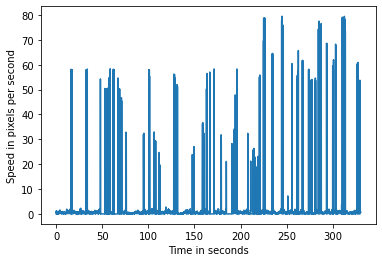

In [46]:
%matplotlib inline

plt.plot(time,vel*1./fps)
plt.xlabel('Time in seconds')
plt.ylabel('Speed in pixels per second')
plt.show()

In [47]:
#define bounding boxes (here for left and right side of treadmill, displayed below)
from collections import namedtuple
position = namedtuple('position', ['topleft', 'bottomright'])
bp_tracking = np.array((xsnout, ysnout, vsnout))

#two points defining each roi: topleft(X,Y) and bottomright(X,Y).
rois = {'leftside': position((150, 0), (366,500)),'center': position((366, 0), (582, 500)),'rightside': position((582, 0), (810, 500))} 
print(rois)

{'leftside': position(topleft=(150, 0), bottomright=(366, 500)), 'center': position(topleft=(366, 0), bottomright=(582, 500)), 'rightside': position(topleft=(582, 0), bottomright=(810, 500))}


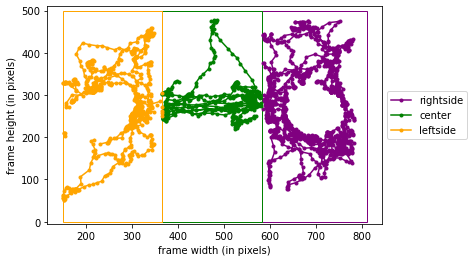

In [48]:
import numpy as np
import matplotlib.patches as patches

fig, ax = plt.subplots(1)

# Create a mask to identify the data points that are inside the rightside ROI
mask = (xsnout >= rois['rightside'].topleft[0]) & (xsnout <= rois['rightside'].bottomright[0]) & \
       (ysnout >= rois['rightside'].topleft[1]) & (ysnout <= rois['rightside'].bottomright[1])

# Plot the data points inside the rightside ROI with gaps
plt.plot(np.where(mask, xsnout, np.nan), np.where(mask, ysnout, np.nan), '.-', color='purple', label='rightside')

# Create a mask to identify the data points that are inside the center ROI
mask = (xsnout >= rois['center'].topleft[0]) & (xsnout <= rois['center'].bottomright[0]) & \
       (ysnout >= rois['center'].topleft[1]) & (ysnout <= rois['center'].bottomright[1])

# Plot the data points inside the center ROI with gaps
plt.plot(np.where(mask, xsnout, np.nan), np.where(mask, ysnout, np.nan), '.-', color='green', label='center')

# Create a mask to identify the data points that are inside the leftside ROI
mask = (xsnout >= rois['leftside'].topleft[0]) & (xsnout <= rois['leftside'].bottomright[0]) & \
       (ysnout >= rois['leftside'].topleft[1]) & (ysnout <= rois['leftside'].bottomright[1])

# Plot the data points inside the leftside ROI with gaps
plt.plot(np.where(mask, xsnout, np.nan), np.where(mask, ysnout, np.nan), '.-', color='orange', label='leftside')

# Add the ROI rectangles to the plot
rect = patches.Rectangle(rois['rightside'].topleft, rois['rightside'].bottomright[0] - rois['rightside'].topleft[0], 
                         rois['rightside'].bottomright[1] - rois['rightside'].topleft[1], linewidth=1, edgecolor='purple', facecolor='none')
ax.add_patch(rect)


rect = patches.Rectangle(rois['center'].topleft, rois['center'].bottomright[0] - rois['center'].topleft[0], 
                         rois['center'].bottomright[1] - rois['center'].topleft[1], linewidth=1, edgecolor='green', facecolor='none')

ax.add_patch(rect)

 
rect = patches.Rectangle(rois['leftside'].topleft, rois['leftside'].bottomright[0] - rois['leftside'].topleft[0], 
                         rois['leftside'].bottomright[1] - rois['leftside'].topleft[1], linewidth=1, edgecolor='orange', facecolor='none')
ax.add_patch(rect)

# Add legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.ylim(-5, 510)
plt.xlabel('frame width (in pixels)')
plt.ylabel('frame height (in pixels)')
plt.show()


In [50]:
import time_in_each_roi #the function needs to be in the same folder as the notebook

res = time_in_each_roi.get_timeinrois_stats(bp_tracking.T, rois, fps=13.88)

#print results:
res

c:\Users\Berni\Desktop\Msc thesis\time_in_each_roi.py:134: UserWarning: Warning: you've set check_inroi=False, so data reflect which ROI is closest even if tracked point is not in any given ROI.
  warnings.warn("Warning: you've set check_inroi=False, so data reflect which ROI is closest even if tracked point is not in any given ROI.")


{'transitions_per_roi': {'center': 34,
  'leftside': 60,
  'rightside': 52,
  'tot': 146},
 'cumulative_time_in_roi': {'rightside': 1773,
  'leftside': 1676,
  'center': 1133,
  'tot': 4582},
 'cumulative_time_in_roi_sec': {'rightside': 127.73775216138328,
  'leftside': 120.74927953890489,
  'center': 81.62824207492795,
  'tot': 330.1152737752161},
 'avg_time_in_roi': {'center': 52.14705882352941,
  'leftside': 27.933333333333334,
  'rightside': 21.78846153846154,
  'tot': 101.86885369532428},
 'avg_time_in_roi_sec': {'center': 3.75699271062892,
  'leftside': 2.0124879923150814,
  'rightside': 1.5697738860563069,
  'tot': 7.3392545890003085},
 'avg_vel_in_roi': {'rightside': 25.933505373417688,
  'leftside': 44.98842417384444,
  'center': 16.249327824430285,
  'tot': 87.1712573716924}}

In [51]:
res_new2={'transitions_per_roi': {'center': 34,
  'leftside': 60,
  'rightside': 52,
  'total': 146},
 'cumulative_time_in_roi': {'rightside': 1773,
  'center': 1133,
  'leftside': 1676,
  'total': 4582},
 'cumulative_time_in_roi_sec': {'rightside': 127.73775216138328,
  'center': 81.62824207492795,
  'leftside': 120.74927953890489,
  'total': 330.1152737752161},
 'avg_time_in_roi': {'center': 52.14705882352941,
  'leftside': 18.883333333333333,
  'rightside': 32.23076923076923,
  'total': 103.26116138763197},
 'avg_time_in_roi_sec': {'center': 3.75699271062892,
  'leftside': 1.360470701248799,
  'rightside': 2.3221015295943253,
  'total': 7.439564941472044},
 'avg_vel_in_roi': {'rightside': 25.933505373417688,
  'center': 16.249327824430285,
  'leftside': 44.98842417384444,
  'total': 87.1712573716924}}

In [52]:
ind2_time_in_each_roi_table=pd.DataFrame.from_dict(res_new2)
ind2_time_in_each_roi_table

,transitions_per_roi,cumulative_time_in_roi,cumulative_time_in_roi_sec,avg_time_in_roi,avg_time_in_roi_sec,avg_vel_in_roi
center,34,1133,81.628242,52.147059,3.756993,16.249328
leftside,60,1676,120.749280,18.883333,1.360471,44.988424
rightside,52,1773,127.737752,32.230769,2.322102,25.933505
total,146,4582,330.115274,103.261161,7.439565,87.171257


In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

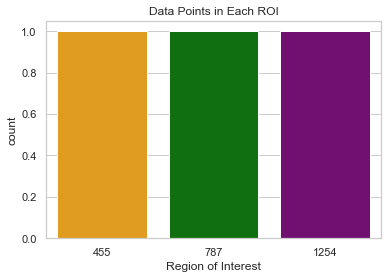

In [55]:
# Create a mask to identify the data points that are inside the rightside ROI
mask_right = (xsnout >= rois['rightside'].topleft[0]) & (xsnout <= rois['rightside'].bottomright[0]) & \
       (ysnout >= rois['rightside'].topleft[1]) & (ysnout <= rois['rightside'].bottomright[1])
# Count the number of data points in the rightside ROI
count_right = np.count_nonzero(mask_right)

# Create a mask to identify the data points that are inside the center ROI
mask_center = (xsnout >= rois['center'].topleft[0]) & (xsnout <= rois['center'].bottomright[0]) & \
       (ysnout >= rois['center'].topleft[1]) & (ysnout <= rois['center'].bottomright[1])
# Count the number of data points in the center ROI
count_center = np.count_nonzero(mask_center)

# Create a mask to identify the data points that are inside the leftside ROI
mask_left = (xsnout >= rois['leftside'].topleft[0]) & (xsnout <= rois['leftside'].bottomright[0]) & \
       (ysnout >= rois['leftside'].topleft[1]) & (ysnout <= rois['leftside'].bottomright[1])
# Count the number of data points in the leftside ROI
count_left = np.count_nonzero(mask_left)

# Create a list of the counts
counts = [count_left, count_center, count_right]

# Create a countplot using Seaborn

sns.set(style='whitegrid')
plt.figure(figsize=(6, 4))
ax = sns.countplot(x=counts, palette=['orange', 'green', 'purple'])
plt.title('Data Points in Each ROI')
plt.xlabel('Region of Interest')
plt.show()

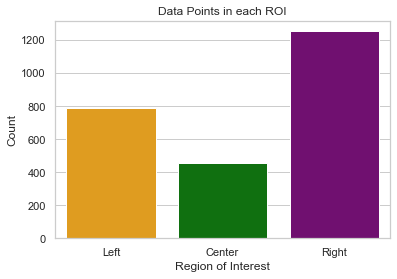

In [58]:
# create the counts DataFrame
counts = pd.DataFrame({'Region': ['Left', 'Center', 'Right'], 'Counts': [count_left, count_center, count_right]})

# set plot style and create figure
sns.set(style='whitegrid')
plt.figure(figsize=(6, 4))

# create count plot with modified axes
ax = sns.barplot(x='Region', y='Counts', data=counts, palette=['orange', 'green', 'purple'])
plt.title('Data Points in each ROI')
plt.xlabel('Region of Interest')
plt.ylabel('Count')

# display the plot
plt.show()


In [79]:
ind2_time_in_each_roi_table.index.name='Chambers'
ind2_time_in_each_roi_table=ind2_time_in_each_roi_table.reset_index()

In [80]:
ind2_time_in_each_roi_table

,Chambers,transitions_per_roi,cumulative_time_in_roi,cumulative_time_in_roi_sec,avg_time_in_roi,avg_time_in_roi_sec,avg_vel_in_roi
0,center,34,1133,81.628242,52.147059,3.756993,16.249328
1,leftside,60,1676,120.749280,18.883333,1.360471,44.988424
2,rightside,52,1773,127.737752,32.230769,2.322102,25.933505
3,total,146,4582,330.115274,103.261161,7.439565,87.171257


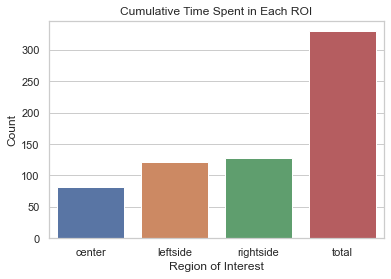

In [81]:
dt=ind2_time_in_each_roi_table
sns.set(style='whitegrid')
sns.barplot(data=dt,x=dt['Chambers'],y=dt['cumulative_time_in_roi_sec'])
plt.title('Cumulative Time Spent in Each ROI')
plt.xlabel('Region of Interest')
plt.ylabel('Count')
plt.show()
